# <p style="background-color:#010521 ;font-family:Comic Sans MS; color:white;font-size:150%;text-align:center;border-radius:55px 1px;">STROKE PREDICTION</p>
<center>
<img style="border-radius: 50%" src="Stroke pic.jpeg" width="1100" >
</center>
<br>
<br>

# <p style="background-color:#010521 ;font-family:Comic Sans MS;color:white;font-size:100%;text-align:center;border-radius:55px 1px;">Implementations & Data Load:</p>   
<font color='Red'>
You Must Run The Following Code Pieces in case to Run any Model From The Models Below

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, ShuffleSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,accuracy_score, classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action="ignore")

# Read the data File:
data = pd.read_csv("Stroke prediction.csv")

# Take a look at the first 5 columns of the data before preprocessing:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
2,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
3,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
4,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1


# <p style="background-color:#010521 ;font-family:Comic Sans MS;color:white;font-size:100%;text-align:center;border-radius:55px 1px;">Data Preprocessing</p>

In [2]:
# Drop the id column since it is not helpful to us:
data.drop("id", axis = 1, inplace=True)

# Convert the text data into numeric data:
data['ever_married'] = data['ever_married'].map({'Yes':1 ,'No':0})
data['gender'] = data['gender'].map({'Male':1 ,'Female':0})
data['work_type'] = data['work_type'].map({'Private':0 ,'Self-employed':1,'Govt_job':2,'Never_worked':3,'children':4})
data['Residence_type'] = data['Residence_type'].map({'Urban':1 ,'Rural':0})
data['smoking_status'] = data['smoking_status'].map({'never smoked':0 ,'smokes':1,'formerly smoked':2,'Unknown':3 })

# Convert the N/A data into the mean of the data:
data['bmi'].fillna(data['bmi'].mean(), inplace=True)

# Take a look at the first 5 columns of the data after our editing:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,0,1,228.69,36.60000,2,1
1,0,59.0,0,0,1,0,0,76.15,28.89456,3,1
2,0,61.0,0,0,1,1,0,202.21,28.89456,0,1
3,1,80.0,0,1,1,0,0,105.92,32.50000,0,1
4,0,49.0,0,0,1,0,1,171.23,34.40000,1,1


In [3]:
stroke_counts = data[data['stroke'] == 1].groupby('gender')['stroke'].count()

# Convert the index to gender labels for better readability
stroke_counts.index = ['Female' if i == 0 else 'Male' for i in stroke_counts.index]

print(stroke_counts)

Female    141
Male      108
Name: stroke, dtype: int64


# <p style="background-color:#010521 ;font-family:Comic Sans MS;color:white;font-size:100%;text-align:center;border-radius:55px 1px;">Data Description:</p>

In [4]:
data.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000
mean,0.413975,43.229986,0.097475,0.054022,0.656293,0.968291,0.508123,106.140399,28.894560,1.407125,0.048738
std,0.492592,22.613575,0.296633,0.226084,0.474991,1.388428,0.499983,45.285004,7.698235,1.259667,0.215340
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,77.240000,23.800000,0.000000,0.000000
50%,0.000000,45.000000,0.000000,0.000000,1.000000,0.000000,1.000000,91.880000,28.400000,1.000000,0.000000
75%,1.000000,61.000000,0.000000,0.000000,1.000000,2.000000,1.000000,114.090000,32.800000,3.000000,0.000000
max,1.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,97.600000,3.000000,1.000000


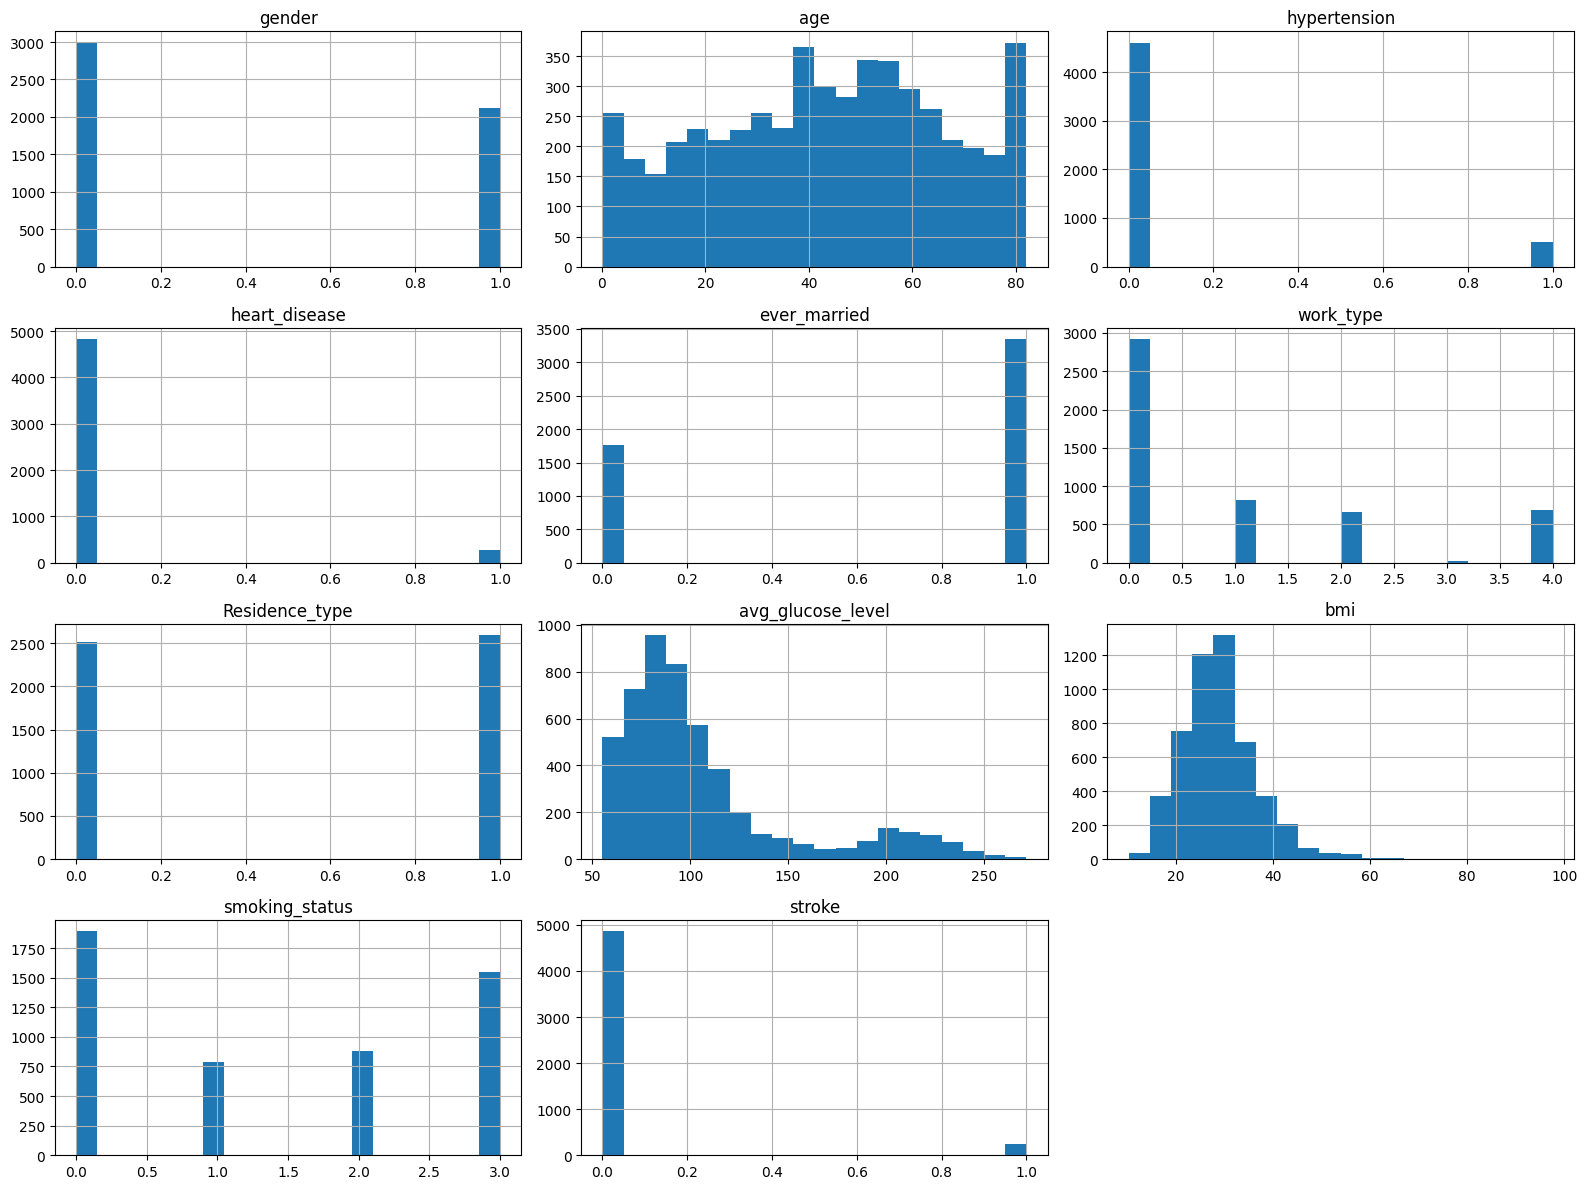

In [5]:
data.hist(bins=20, figsize=(16, 12))
plt.tight_layout()
plt.show()

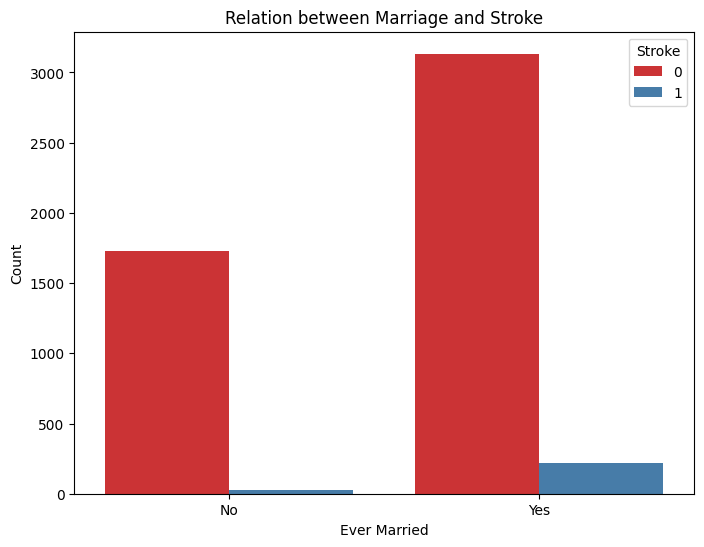

In [6]:
plt.figure(figsize=(8, 6))
sns.countplot(x='ever_married', hue='stroke', data=data , palette='Set1')

# Add labels and title
plt.xlabel('Ever Married')
plt.ylabel('Count')
plt.title('Relation between Marriage and Stroke')
plt.xticks([0, 1], ['No', 'Yes'])
plt.legend(title='Stroke', loc='upper right')

plt.show()

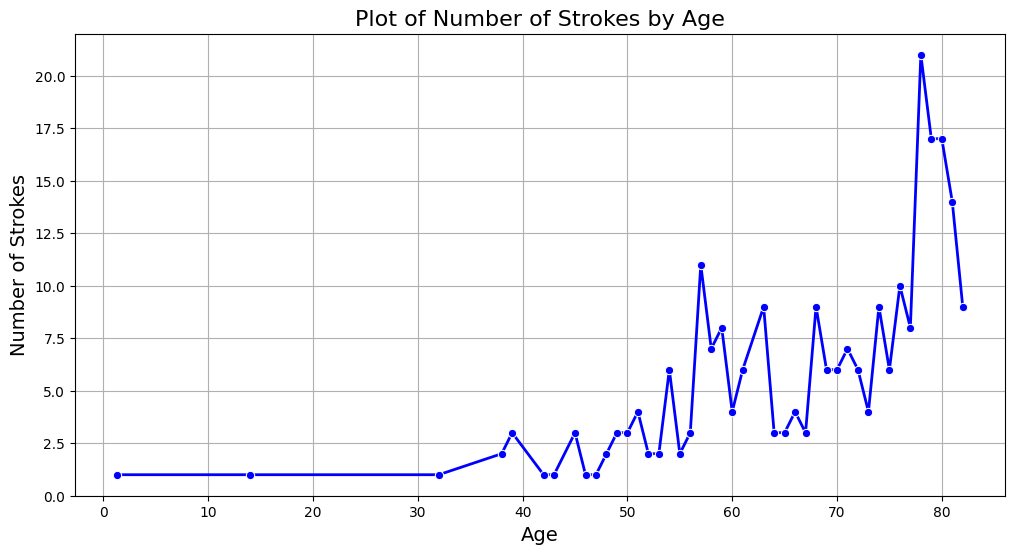

In [7]:
stroke_count_by_age = data[data['stroke'] == 1].groupby('age').size().reset_index(name='stroke_count')

# Sort by age for a smooth line plot
stroke_count_by_age = stroke_count_by_age.sort_values(by='age')

# Line plot with smoothing to show the number of stroked individuals by age
plt.figure(figsize=(12, 6))
sns.lineplot(data=stroke_count_by_age, x='age', y='stroke_count', marker='o', color='blue', lw=2)

# Add labels and title
plt.xlabel('Age', fontsize=14)
plt.ylabel('Number of Strokes', fontsize=14)
plt.title('Plot of Number of Strokes by Age', fontsize=16)

# Show the plot
plt.grid()
plt.show()

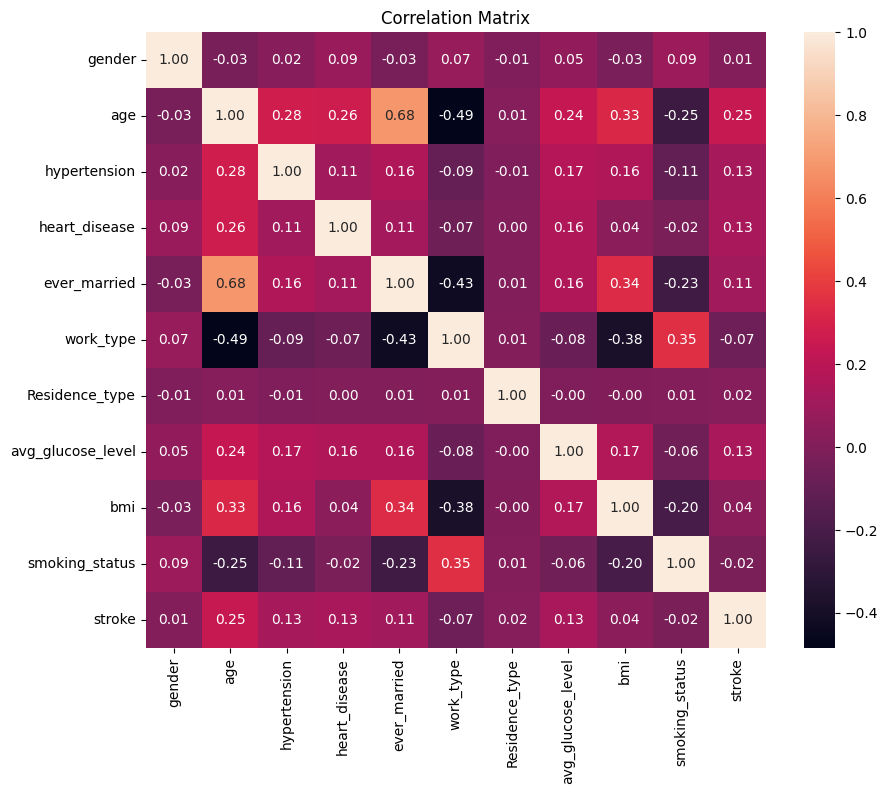

In [8]:
# draw a correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(pd.DataFrame(data, columns=data.columns).corr(), annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [9]:
data = data.drop(['Residence_type'], axis=1)

# <p style="background-color:#010521 ;font-family:Comic Sans MS;color:white;font-size:100%;text-align:center;border-radius:55px 1px;">Split the data into features (X) and target variable (y)</p>

In [10]:
y = data['stroke']
X = data.drop(['stroke'], axis=1)

# <p style="background-color:#010521 ;font-family:Comic Sans MS;color:white;font-size:100%;text-align:center;border-radius:55px 1px;">Split the data into training and testing sets</p>

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=900)

# <p style="background-color:#010521 ;font-family:Comic Sans MS;color:white;font-size:100%;text-align:center;border-radius:55px 1px;">Scale features using StandardScaler</p>

In [12]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# standardizing the features ensures that the model treats all features equally, it prevents the features with larger scales
# from dominating the features with smaller scales. and it can improve the convergence speed of optimization algorithms and lead 
# to better performance and stability of the model

# <p style="background-color:#010521 ;font-family:Comic Sans MS;color:white;font-size:100%;text-align:center;border-radius:55px 1px;">MODELS AGENDA</p>  

You Can Choose the model you want to run from these Different Classification Models :


<font color='Red'>
Content:

1. [KNN-Classification](#Knn-Classification)
2. [Decision Tree Classification](#decision-tree-classification)
3. [Support Vector Classification](#support-vector-classification)
4. [Random Forest Classification](#random-forest-classification)
5. [Logistic Regression](#logistic-regression)

# KNN Classification:
K-Nearest Neighbors (KNN) Classifier is a simple and intuitive machine learning algorithm used for classification tasks. It belongs to the family of lazy or instance-based learning algorithms.

In [13]:
from sklearn.neighbors import KNeighborsClassifier  # Import KNeighborsClassifier

# Initialize KNN Classifier and fit the model
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train_scaled, y_train)

# Apply cross-validation 
cv = ShuffleSplit(n_splits=5, test_size=0.1, random_state=42)
cv_scores = cross_val_score(knn_classifier, X_train_scaled, y_train, cv=cv, scoring='accuracy')

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy: {:.2%}".format(cv_scores.mean()))

# Make predictions
y_pred = knn_classifier.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2%}")

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Cross-Validation Scores: [0.92909535 0.93643032 0.92665037 0.92665037 0.95354523]
Mean Accuracy: 93.45%
Accuracy: 94.52%
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       979
           1       0.07      0.02      0.03        43

    accuracy                           0.95      1022
   macro avg       0.51      0.50      0.50      1022
weighted avg       0.92      0.95      0.93      1022



# Decision Tree Classification:
Decision Tree Classification is a machine learning algorithm used for predicting categorical outcomes or class labels. It is widely employed in various domains for its simplicity and interpretability.

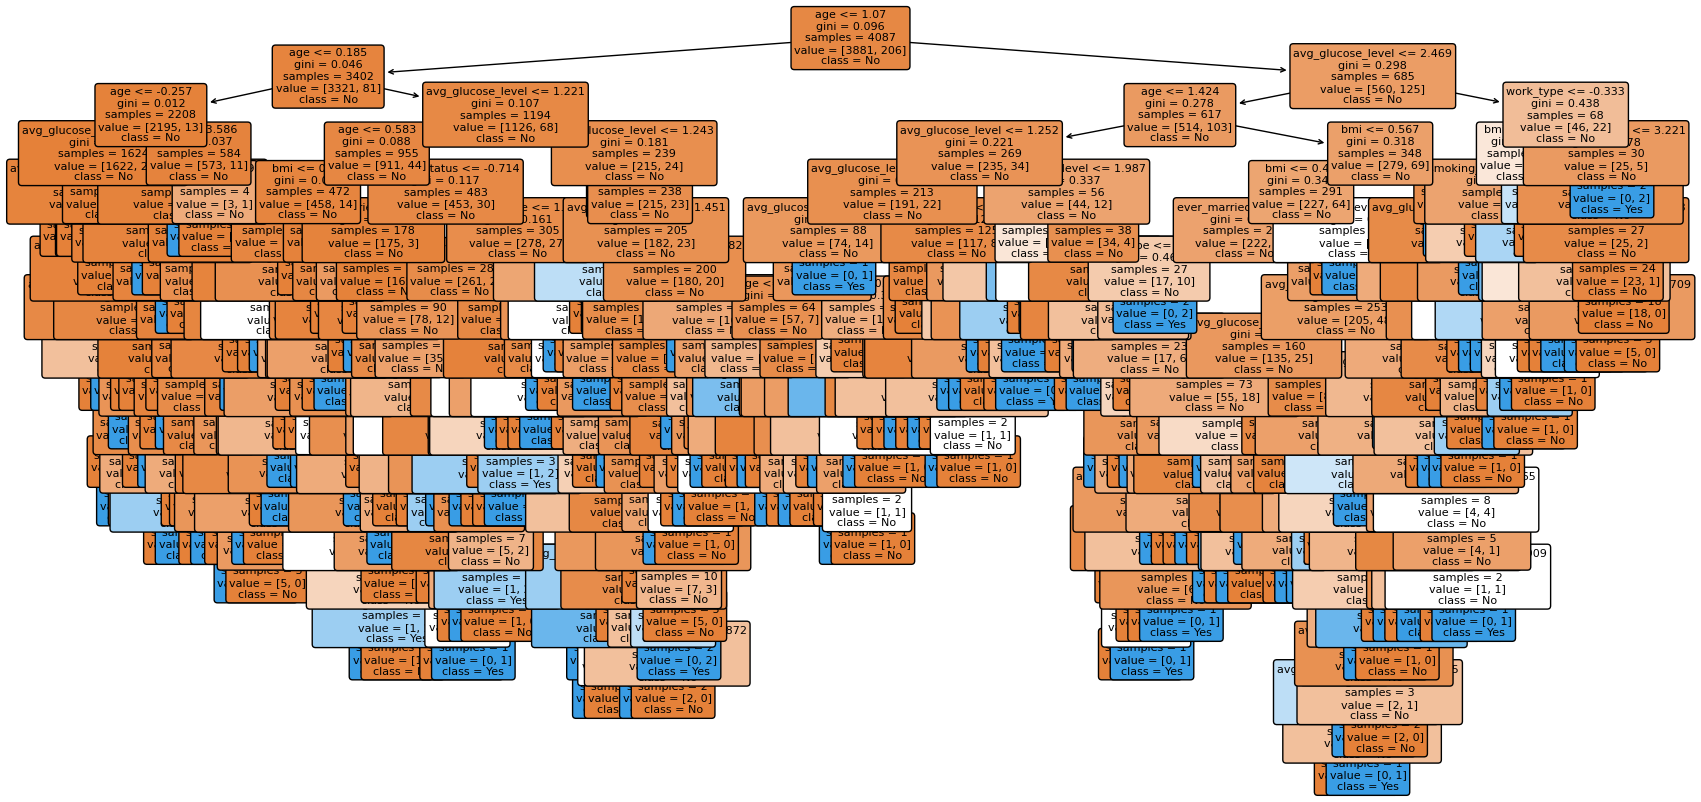

Cross-Validation Scores: [0.89242054 0.89731051 0.90953545 0.90709046 0.89731051]
Mean Accuracy: 90.07%
Accuracy: 91.10%
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.95       979
           1       0.17      0.28      0.21        43

    accuracy                           0.91      1022
   macro avg       0.57      0.61      0.58      1022
weighted avg       0.93      0.91      0.92      1022



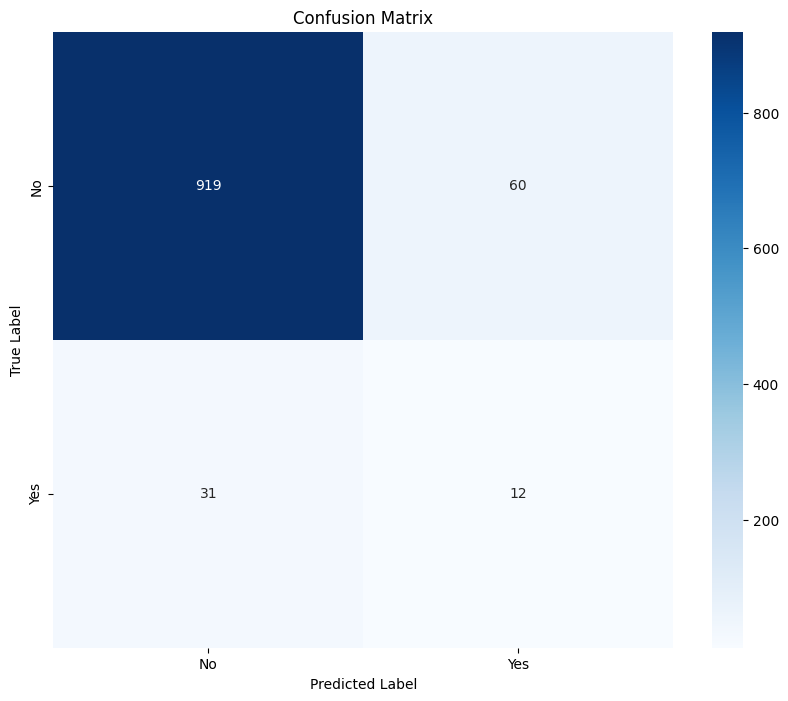

In [14]:
from sklearn.tree import DecisionTreeClassifier, plot_tree  # Import Decision Tree Classifier and plot_tree

# Initialize Decision Tree Classifier and fit the model
decision_tree_classifier = DecisionTreeClassifier(random_state=42)
decision_tree_classifier.fit(X_train_scaled, y_train)

# Plot the decision tree
labels = ['No', 'Yes']
plt.figure(figsize=(20, 10))
plot_tree(decision_tree_classifier, filled=True, feature_names=X.columns, class_names=labels, rounded=True, fontsize=8)
plt.show()

# Apply cross-validation
cv = ShuffleSplit(n_splits=5, test_size=0.1, random_state=42)
cv_scores = cross_val_score(decision_tree_classifier, X_train_scaled, y_train, cv=cv, scoring='accuracy')

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy: {:.2%}".format(cv_scores.mean()))

# Make predictions
y_pred = decision_tree_classifier.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2%}")

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Support Vector Classification:
Support Vector Classification, commonly known as Support Vector Machine (SVM), is a powerful machine learning algorithm used for classification tasks.

In [15]:
from sklearn.svm import SVC  # Import SVC for classification

# Initialize Support Vector Classifier (SVC) and fit the model
svc_classifier = SVC()
svc_classifier.fit(X_train_scaled, y_train)

# Apply cross-validation
cv = ShuffleSplit(n_splits=5, test_size=0.1, random_state=42)
cv_scores = cross_val_score(svc_classifier, X_train_scaled, y_train, cv=cv, scoring='accuracy')

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy: {:.2%}".format(cv_scores.mean()))

# Make predictions
y_pred = svc_classifier.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2%}")

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Cross-Validation Scores: [0.94132029 0.95843521 0.95110024 0.94621027 0.9608802 ]
Mean Accuracy: 95.16%
Accuracy: 95.79%
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       979
           1       0.00      0.00      0.00        43

    accuracy                           0.96      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.92      0.96      0.94      1022



# Random Forest Classification:
Random Forest Classification is a go-to choice for many practitioners due to its ability to improve accuracy and handle complex datasets. It is particularly useful when interpretability of individual trees is not a primary concern, and the focus is on achieving robust and accurate predictions.

In [16]:
from sklearn.ensemble import RandomForestClassifier  # Import Random Forest Classifier

# Initialize Random Forest Classifier and fit the model
random_forest_classifier = RandomForestClassifier(random_state=42)
random_forest_classifier.fit(X_train_scaled, y_train)

# Apply cross-validation
cv = ShuffleSplit(n_splits=5, test_size=0.1, random_state=42)
cv_scores = cross_val_score(random_forest_classifier, X_train_scaled, y_train, cv=cv, scoring='accuracy')

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy: {:.2%}".format(cv_scores.mean()))

# Make predictions
y_pred = random_forest_classifier.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2%}")

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Cross-Validation Scores: [0.93887531 0.95599022 0.94621027 0.94376528 0.95843521]
Mean Accuracy: 94.87%
Accuracy: 95.50%
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       979
           1       0.20      0.02      0.04        43

    accuracy                           0.95      1022
   macro avg       0.58      0.51      0.51      1022
weighted avg       0.93      0.95      0.94      1022



# Logistic Regression:
Logistic Regression is a statistical and machine learning model used for binary and multi-class classification tasks. Despite its name, it is primarily employed for classification rather than regression.


In [17]:
from sklearn.linear_model import LogisticRegression  # Import Logistic Regression

# Initialize Logistic Regression and fit the model
logistic_regressor = LogisticRegression(max_iter=1000, random_state=42)
logistic_regressor.fit(X_train_scaled, y_train)

# Apply cross-validation
cv = ShuffleSplit(n_splits=6, test_size=0.25, random_state=42)
cv_scores = cross_val_score(logistic_regressor, X_train_scaled, y_train, cv=cv, scoring='accuracy')

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy: {:.2%}".format(cv_scores.mean()))

# Make predictions
y_pred = logistic_regressor.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2%}")

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Cross-Validation Scores: [0.95596869 0.95499022 0.94618395 0.94422701 0.95596869 0.95694716]
Mean Accuracy: 95.24%
Accuracy: 95.79%
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       979
           1       0.00      0.00      0.00        43

    accuracy                           0.96      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.92      0.96      0.94      1022



# <p style="background-color:#010521 ;font-family:Comic Sans MS;color:white;font-size:100%;text-align:center;border-radius:55px 1px;">Summary :</p>

From the above metrics we can conclude that :
<br>
Decision Tree model gave us the best evaluation results and it is the best models
<br>
So, We will Save the Decision Tree model model as Pickle file :

In [18]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,0,228.69,36.60000,2,1
1,0,59.0,0,0,1,0,76.15,28.89456,3,1
2,0,61.0,0,0,1,1,202.21,28.89456,0,1
3,1,80.0,0,1,1,0,105.92,32.50000,0,1
4,0,49.0,0,0,1,0,171.23,34.40000,1,1


In [21]:
import pickle
with open('Decision Tree Classifier.pkl', 'wb') as file:
    pickle.dump(decision_tree_classifier, file)
    print("Model Saved Successfully")

Model Saved Successfully


To Load the model again later :

In [22]:
# Step 6: To load the model later, use the following code:
with open('Decision Tree Classifier.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# You can now use loaded_model to make predictions
# For example:
loaded_y_pred = loaded_model.predict(X_test_scaled)